### Health Status of child 
* Average weight and  income corelation*
* Weight and continent corelation

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

In [ ]:
df = pd.read_csv('data/Child malnutrition.csv')

In [ ]:
df.head(5)

In [ ]:
df.columns

In [ ]:
column_counts = df['Overweight'].value_counts()

print(column_counts)

In [ ]:
df['Overweight'] = df['Overweight'].astype(float)

In [ ]:
df2 = df.groupby('World Bank')['Overweight'].mean().sort_values()
df2

In [ ]:
plt.figure(figsize = (12, 12))
df2.plot(kind = 'barh')

plt.title("Child Average Weight Ratings By Income")

In [ ]:
type(df2)

In [ ]:
df3 = df.groupby('Continent')['Overweight'].mean().sort_values()
df3

In [ ]:
plt.figure(figsize = (12, 12))
df3.plot(kind = 'barh')

plt.title("Child Average Weight Ratings By Continent")



## 4 Major Health Issues in USA from 2004 to 2017

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris


In [27]:
health_df = pd.read_csv('data/4healthissues.csv')

In [28]:
health_df.head(10)

,StateAbbr,2004+cardiovascular,2004+stroke,2004+obesity,2004+diabetes,2005+cardiovascular,2005+stroke,2005+obesity,2005+diabetes,2006+cardiovascular,...,2015+obesity,2015+diabetes,2016+cardiovascular,2016+stroke,2016+obesity,2016+diabetes,2017+cardiovascular,2017+stroke,2017+obesity,2017+diabetes
0,ME,6,17,29,38,16,38,14,23,23,...,48,73,38,70,49,81,37,83,47,80
1,NY,6,13,27,32,15,35,15,19,18,...,46,63,41,47,49,77,34,53,52,78
2,NY,3,16,31,37,8,44,24,18,19,...,67,75,33,66,70,74,24,71,61,72
3,GA,14,14,29,31,25,48,23,22,24,...,60,73,59,65,51,78,38,62,41,66
4,PA,7,16,30,37,17,39,18,23,24,...,56,72,42,56,52,80,35,61,56,78
5,MI,6,16,27,34,14,43,18,20,21,...,46,65,48,60,43,73,38,66,45,74
6,NH,6,15,27,37,16,41,15,22,20,...,58,71,44,54,53,76,37,58,58,74
7,GA,11,17,45,26,11,50,18,25,23,...,69,67,45,62,46,70,32,71,44,74
8,PA,10,17,35,43,17,49,20,26,23,...,54,72,42,66,50,79,35,73,52,79
9,IN,4,14,25,36,13,43,25,20,17,...,64,78,54,61,55,84,36,67,49,81


In [ ]:
health_df.info(verbose=True)

In [5]:
health_df.columns

Index(['StateAbbr', '2004+cardiovascular', '2004+stroke', '2004+obesity',
       '2004+diabetes', '2005+cardiovascular', '2005+stroke', '2005+obesity',
       '2005+diabetes', '2006+cardiovascular', '2006+stroke', '2006+obesity',
       '2006+diabetes', '2007+cardiovascular', '2007+stroke', '2007+obesity',
       '2007+diabetes', '2008+cardiovascular', '2008+stroke', '2008+obesity',
       '2008+diabetes', '2009+cardiovascular', '2009+stroke', '2009+obesity',
       '2009+diabetes', '2010+cardiovascular', '2010+stroke', '2010+obesity',
       '2010+diabetes', '2011+cardiovascular', '2011+stroke', '2011+obesity',
       '2011+diabetes', '2012+cardiovascular', '2012+stroke', '2012+obesity',
       '2012+diabetes', '2013+cardiovascular', '2013+stroke', '2013+obesity',
       '2013+diabetes', '2014+cardiovascular', '2014+stroke', '2014+obesity',
       '2014+diabetes', '2015+cardiovascular', '2015+stroke', '2015+obesity',
       '2015+diabetes', '2016+cardiovascular', '2016+stroke', '2016+

In [26]:
# health_df = health_df.rename(columns={'2004+obesity': 'obesity_2004',
#                                       '2005+obesity': 'obesity_2005',
#                                       '2006+obesity': 'obesity_2006',
#                                       '2007+obesity': 'obesity_2007',
#                                       '2008+obesity': 'obesity_2008',
#                                       '2009+obesity': 'obesity_2009',
#                                       '2010+obesity': 'obesity_2010',
#                                       '2011+obesity': 'obesity_2011',
#                                       '2012+obesity': 'obesity_2012',
#                                       '2013+obesity': 'obesity_2013',
#                                       '2014+obesity': 'obesity_2014',
#                                       '2015+obesity': 'obesity_2015',
#                                       '2016+obesity': 'obesity_2016',
#                                       '2017+obesity': 'obesity_2017'})


# x = ['StateAbbr']
# y = np.array(health_df[['obesity_2004', 'obesity_2005', 'obesity_2006', 'obesity_2007', 'obesity_2008',
#                          'obesity_2009', 'obesity_2010', 'obesity_2011', 'obesity_2012', 'obesity_2013',
#                          'obesity_2014', 'obesity_2015', 'obesity_2016', 'obesity_2017']])
# plt.plot(x, y)
# plt.show()


In [29]:
column_names = health_df.columns.tolist()
new_column_names = {col:col.replace('+', '_') for col in column_names}
health_df = health_df.rename(columns=new_column_names)

In [30]:
health_df

,StateAbbr,2004_cardiovascular,2004_stroke,2004_obesity,2004_diabetes,2005_cardiovascular,2005_stroke,2005_obesity,2005_diabetes,2006_cardiovascular,...,2015_obesity,2015_diabetes,2016_cardiovascular,2016_stroke,2016_obesity,2016_diabetes,2017_cardiovascular,2017_stroke,2017_obesity,2017_diabetes
0,ME,6,17,29,38,16,38,14,23,23,...,48,73,38,70,49,81,37,83,47,80
1,NY,6,13,27,32,15,35,15,19,18,...,46,63,41,47,49,77,34,53,52,78
2,NY,3,16,31,37,8,44,24,18,19,...,67,75,33,66,70,74,24,71,61,72
3,GA,14,14,29,31,25,48,23,22,24,...,60,73,59,65,51,78,38,62,41,66
4,PA,7,16,30,37,17,39,18,23,24,...,56,72,42,56,52,80,35,61,56,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CA,5,13,38,27,10,31,15,15,13,...,56,57,35,51,54,63,24,60,53,63
206,CA,4,17,29,35,13,45,19,23,16,...,58,73,38,57,48,75,29,64,55,76
207,CA,7,13,33,34,17,35,24,21,15,...,58,65,55,52,64,81,42,61,63,77
208,CA,4,22,41,24,10,45,38,19,10,...,60,66,36,67,63,75,38,76,62,75


ValueError: x and y must have same first dimension, but have shapes (1,) and (210, 14)

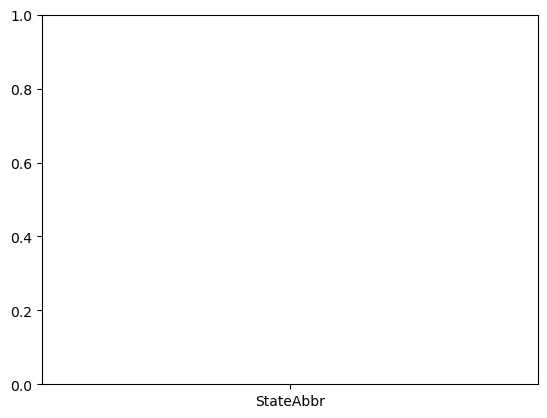

In [16]:
x = ['StateAbbr']
y = np.array(health_df[['obesity_2004', 'obesity_2005', 'obesity_2006', 'obesity_2007', 'obesity_2008',
                         'obesity_2009', 'obesity_2010', 'obesity_2011', 'obesity_2012', 'obesity_2013',
                         'obesity_2014', 'obesity_2015', 'obesity_2016', 'obesity_2017']])
plt.plot(x, y)
plt.show()

In [34]:
desired_states = ['GA']
filtered_df = health_df['StateAbbr'].isin(desired_states)

In [35]:
x = desired_states
y = health_df['2004_obesity', '2005_obesity', '2006_obesity']
plt.plot(x, y)
plt.show()

KeyError: ('2004_obesity', '2005_obesity', '2006_obesity')